<a href="https://colab.research.google.com/github/lucasmeirellesmachado/CDIA-Estatistica_II/blob/main/2%C2%AA_Semana_de_Imers%C3%A3o_Atividade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

In [3]:
base_med = pd.read_csv('https://raw.githubusercontent.com/lucasmeirellesmachado/CDIA-Estatistica_II/refs/heads/main/custo_medico_processamento.csv',
                       decimal = ',')

In [4]:
base_med

,idade,sexo,IMC,filhos,fumante,regiao,custos_medicos,doencas_cronicas,consultas_ano,atividade_fisica,dieta_saudavel,uso_medicamentos
0,19,feminino,27.900,NaN,sim,sudoeste,16884.92400,NaN,4,6,0.390154,2
1,18,masculino,33.770,1.0,NaN,sudeste,1725.55230,2.0,7,3,0.332918,0
2,28,masculino,33.000,3.0,NaN,sudeste,4449.46200,NaN,2,4,0.155488,0
3,33,masculino,22.705,NaN,NaN,noroeste,21984.47061,NaN,2,2,0.524512,4
4,32,masculino,28.880,NaN,NaN,noroeste,3866.85520,NaN,3,3,0.590419,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2767,47,feminino,45.320,1.0,NaN,sudeste,8569.86180,NaN,4,4,0.378308,1
2768,21,feminino,34.600,NaN,NaN,sudoeste,2020.17700,NaN,6,7,0.678442,1
2769,19,masculino,26.030,1.0,sim,noroeste,16450.89470,1.0,6,6,0.543625,0
2770,23,masculino,18.715,NaN,NaN,noroeste,21595.38229,1.0,4,4,0.441058,3


In [5]:
base_med.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   idade             2772 non-null   int64  
 1   sexo              2772 non-null   object 
 2   IMC               2772 non-null   float64
 3   filhos            1586 non-null   float64
 4   fumante           564 non-null    object 
 5   regiao            2772 non-null   object 
 6   custos_medicos    2772 non-null   float64
 7   doencas_cronicas  1513 non-null   float64
 8   consultas_ano     2772 non-null   int64  
 9   atividade_fisica  2772 non-null   int64  
 10  dieta_saudavel    2772 non-null   float64
 11  uso_medicamentos  2772 non-null   int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 260.0+ KB


In [6]:
base_med.isnull().sum()

,0
idade,0
sexo,0
IMC,0
filhos,1186
fumante,2208
regiao,0
custos_medicos,0
doencas_cronicas,1259
consultas_ano,0
atividade_fisica,0


## Tratamento dos dados ##

In [7]:
#Substituir os valores faltantes de diversas colunas

base_med = base_med.fillna ({'fumante': 'nao',
                             'filhos': 0,
                             'doencas_cronicas': 0})

In [8]:
base_med

,idade,sexo,IMC,filhos,fumante,regiao,custos_medicos,doencas_cronicas,consultas_ano,atividade_fisica,dieta_saudavel,uso_medicamentos
0,19,feminino,27.900,0.0,sim,sudoeste,16884.92400,0.0,4,6,0.390154,2
1,18,masculino,33.770,1.0,nao,sudeste,1725.55230,2.0,7,3,0.332918,0
2,28,masculino,33.000,3.0,nao,sudeste,4449.46200,0.0,2,4,0.155488,0
3,33,masculino,22.705,0.0,nao,noroeste,21984.47061,0.0,2,2,0.524512,4
4,32,masculino,28.880,0.0,nao,noroeste,3866.85520,0.0,3,3,0.590419,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2767,47,feminino,45.320,1.0,nao,sudeste,8569.86180,0.0,4,4,0.378308,1
2768,21,feminino,34.600,0.0,nao,sudoeste,2020.17700,0.0,6,7,0.678442,1
2769,19,masculino,26.030,1.0,sim,noroeste,16450.89470,1.0,6,6,0.543625,0
2770,23,masculino,18.715,0.0,nao,noroeste,21595.38229,1.0,4,4,0.441058,3


In [9]:
base_med.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   idade             2772 non-null   int64  
 1   sexo              2772 non-null   object 
 2   IMC               2772 non-null   float64
 3   filhos            2772 non-null   float64
 4   fumante           2772 non-null   object 
 5   regiao            2772 non-null   object 
 6   custos_medicos    2772 non-null   float64
 7   doencas_cronicas  2772 non-null   float64
 8   consultas_ano     2772 non-null   int64  
 9   atividade_fisica  2772 non-null   int64  
 10  dieta_saudavel    2772 non-null   float64
 11  uso_medicamentos  2772 non-null   int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 260.0+ KB


## Dummização de dados ##

In [11]:
base_trat = pd.get_dummies(base_med, columns = ['fumante', 'regiao', 'sexo'], #Atentar para a multicolinearidade dessa variável, pois se trata da mesma, embora estejam em duas colunas
                                    dtype=int,
                                    drop_first=True) #Retira uma das colunas para evitar a multicolinearidade

In [12]:
base_trat

,idade,IMC,filhos,custos_medicos,doencas_cronicas,consultas_ano,atividade_fisica,dieta_saudavel,uso_medicamentos,fumante_sim,regiao_noroeste,regiao_sudeste,regiao_sudoeste,sexo_masculino
0,19,27.900,0.0,16884.92400,0.0,4,6,0.390154,2,1,0,0,1,0
1,18,33.770,1.0,1725.55230,2.0,7,3,0.332918,0,0,0,1,0,1
2,28,33.000,3.0,4449.46200,0.0,2,4,0.155488,0,0,0,1,0,1
3,33,22.705,0.0,21984.47061,0.0,2,2,0.524512,4,0,1,0,0,1
4,32,28.880,0.0,3866.85520,0.0,3,3,0.590419,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2767,47,45.320,1.0,8569.86180,0.0,4,4,0.378308,1,0,0,1,0,0
2768,21,34.600,0.0,2020.17700,0.0,6,7,0.678442,1,0,0,0,1,0
2769,19,26.030,1.0,16450.89470,1.0,6,6,0.543625,0,1,1,0,0,1
2770,23,18.715,0.0,21595.38229,1.0,4,4,0.441058,3,0,1,0,0,1


In [13]:
base_trat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   idade             2772 non-null   int64  
 1   IMC               2772 non-null   float64
 2   filhos            2772 non-null   float64
 3   custos_medicos    2772 non-null   float64
 4   doencas_cronicas  2772 non-null   float64
 5   consultas_ano     2772 non-null   int64  
 6   atividade_fisica  2772 non-null   int64  
 7   dieta_saudavel    2772 non-null   float64
 8   uso_medicamentos  2772 non-null   int64  
 9   fumante_sim       2772 non-null   int64  
 10  regiao_noroeste   2772 non-null   int64  
 11  regiao_sudeste    2772 non-null   int64  
 12  regiao_sudoeste   2772 non-null   int64  
 13  sexo_masculino    2772 non-null   int64  
dtypes: float64(5), int64(9)
memory usage: 303.3 KB


## Análise Exploratória de Dados ##

In [105]:
#Média e dispersão da idade

base_trat.describe()

,idade,IMC,filhos,custos_medicos,doencas_cronicas,consultas_ano,atividade_fisica,dieta_saudavel,uso_medicamentos,fumante_sim,regiao_noroeste,regiao_sudeste,regiao_sudoeste,sexo_masculino
count,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959,0.788961,3.465729,3.557720,0.497944,1.498918,0.203463,0.239538,0.276335,0.246753,0.507215
std,14.081459,6.129449,1.214806,12151.768945,0.893770,1.974736,2.271516,0.198439,1.036504,0.402647,0.426879,0.447265,0.431200,0.500038
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,26.220000,0.000000,4687.797000,0.000000,2.000000,2.000000,0.361441,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.447500,1.000000,9333.014350,1.000000,3.000000,4.000000,0.496439,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,51.000000,34.770000,2.000000,16577.779500,1.000000,5.000000,6.000000,0.631922,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,64.000000,53.130000,5.000000,63770.428010,5.000000,10.000000,7.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000


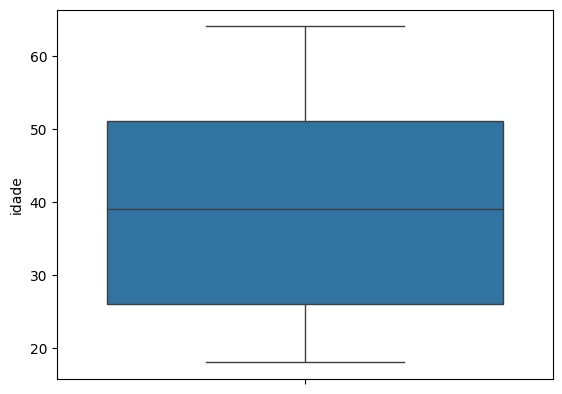

In [103]:
sns.boxplot(y = 'idade', data = base_trat)
plt.xticks(rotation=90)
plt.show()

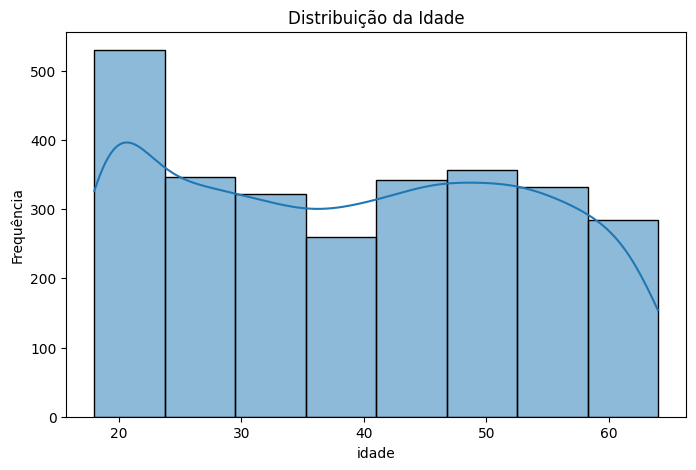

In [56]:
# Distribuição da idade

plt.figure(figsize=(8, 5))
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61-70', '71-100']
sns.histplot(base_trat['idade'], bins=8, kde=True)
plt.title("Distribuição da Idade")
plt.xlabel("idade")
plt.ylabel("Frequência")
plt.show()

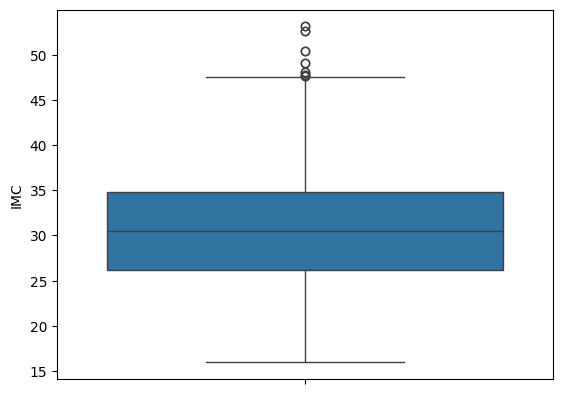

In [20]:
# Distribuição IMC

sns.boxplot(y = 'IMC', data = base_trat)
plt.xticks(rotation=90)
plt.show()

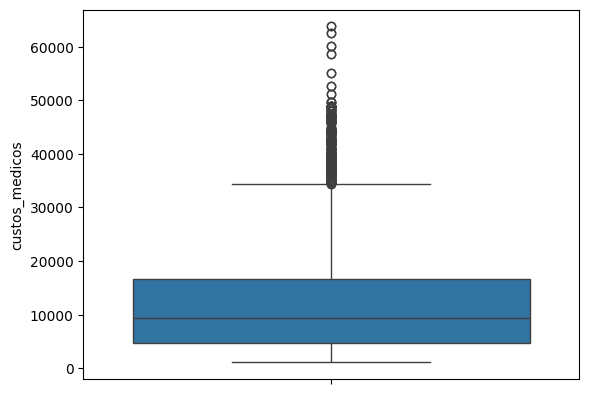

In [57]:
# Distribuição dos custos médicos

sns.boxplot(y = 'custos_medicos', data = base_trat)
plt.xticks(rotation=90)
plt.show()

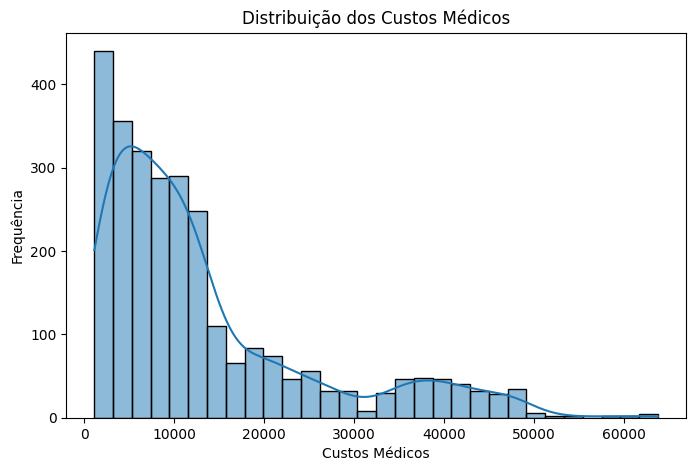

In [28]:
plt.figure(figsize=(8, 5))
sns.histplot(base_trat['custos_medicos'], bins=30, kde=True)
plt.title("Distribuição dos Custos Médicos")
plt.xlabel("Custos Médicos")
plt.ylabel("Frequência")
plt.show()

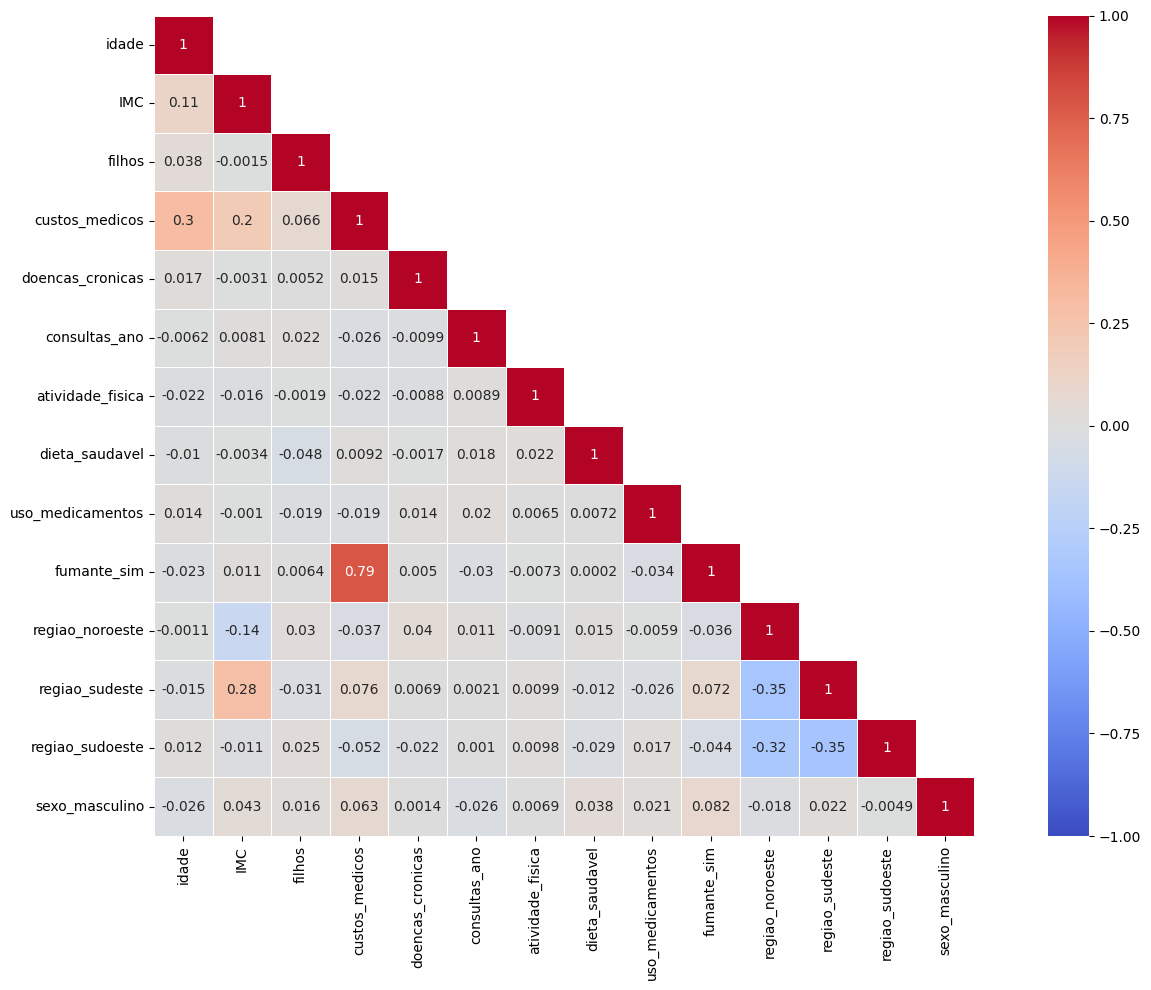

In [67]:
# Criar uma máscara para ocultar os valores acima da diagonal
cor_matriz = base_trat.corr()
mask = np.triu(np.ones_like(cor_matriz, dtype=bool), k=1)

# Plotar a matriz de correlação com a máscara
plt.figure(figsize=(15,10))
sns.heatmap(cor_matriz, annot=True, cmap='coolwarm', mask=mask, vmin=-1, vmax=1, square=True, linewidths=.5)

# Ajustar rótulos e exibir o gráfico
#plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Relação entre custos médicos e tabagismo

In [98]:
# Correlação entre custos médicos e fumantes
from scipy.stats import pointbiserialr

coeficiente, p_valor = pointbiserialr(base_trat['custos_medicos'], base_trat['fumante_sim'])

print(f'Coeficiente de correlação de ponto-bisserial: {coeficiente}')
print(f'P-valor: {p_valor}')

Coeficiente de correlação de ponto-bisserial: 0.7887833491419148
P-valor: 0.0


In [100]:
#Regressão entre custos medicos e fumantes

# Adicionar uma constante para o modelo de regressão
X = sm.add_constant(base_trat[['fumante_sim']])
y = base_trat['custos_medicos']

# Ajustar o modelo de regressão linear
modelo = sm.OLS(y, X).fit()

# Resumo dos resultados do modelo
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:         custos_medicos   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     4562.
Date:                Wed, 05 Feb 2025   Prob (F-statistic):               0.00
Time:                        13:56:06   Log-Likelihood:                -28655.
No. Observations:                2772   AIC:                         5.731e+04
Df Residuals:                    2770   BIC:                         5.733e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        8417.8744    158.987     52.947      

### Relação entre custos médicos e IMC

In [84]:
# Correlação entre custos médicos e IMC

corr, p_value = stats.pearsonr(base_trat['custos_medicos'], base_trat['IMC'])
print("Coeficiente de correlação:", corr)
print("p-valor:", p_value)

Coeficiente de correlação: 0.1998460487397887
p-valor: 2.2935230918641643e-26


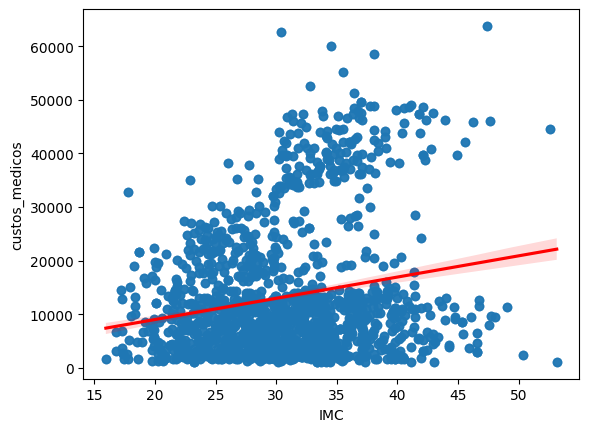

In [79]:
#Regressão entre custos medicos e o IMC

sns.regplot(data=base_trat, x='IMC', y='custos_medicos',line_kws={"color": "red"})
plt.show()

In [80]:
# Ajustando o modelo de regressão linear simples

modelo = ols('custos_medicos ~ IMC',data=base_trat)
res = modelo.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:         custos_medicos   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     115.2
Date:                Wed, 05 Feb 2025   Prob (F-statistic):           2.29e-26
Time:                        12:47:01   Log-Likelihood:                -29948.
No. Observations:                2772   AIC:                         5.990e+04
Df Residuals:                    2770   BIC:                         5.991e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1097.5183   1155.499      0.950      0.3

### Relação entre custos médicos e idade

In [85]:
# Correlação entre custos médicos e idade

corr, p_value = stats.pearsonr(base_trat['custos_medicos'], base_trat['IMC'])
print("Coeficiente de correlação:", corr)
print("p-valor:", p_value)

Coeficiente de correlação: 0.1998460487397887
p-valor: 2.2935230918641643e-26


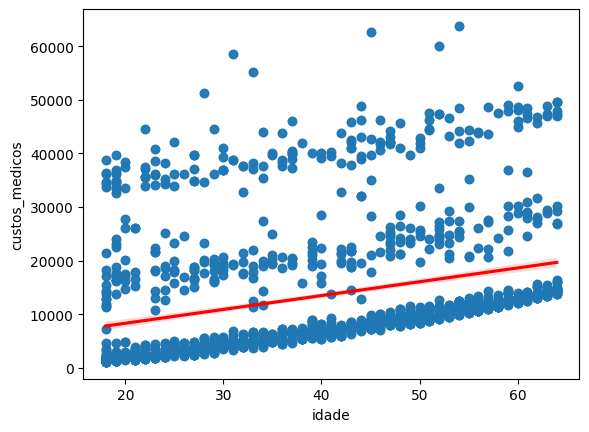

In [86]:
#Regressão entre custos medicos e idade

sns.regplot(data=base_trat, x='idade', y='custos_medicos',line_kws={"color": "red"})
plt.show()

In [87]:
# Ajustando o modelo de regressão linear simples

modelo = ols('custos_medicos ~ idade',data=base_trat)
res = modelo.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:         custos_medicos   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     271.2
Date:                Wed, 05 Feb 2025   Prob (F-statistic):           3.32e-58
Time:                        12:58:11   Log-Likelihood:                -29875.
No. Observations:                2772   AIC:                         5.975e+04
Df Residuals:                    2770   BIC:                         5.977e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3182.7705    650.450      4.893      0.0

### Relação entre custos médicos, idade, IMC e tabagismo

In [96]:
# Ajustando o modelo de regressão linear múltipla

modelo = ols('custos_medicos ~ idade + IMC + fumante_sim',data=base_trat)
res = modelo.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:         custos_medicos   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     2724.
Date:                Wed, 05 Feb 2025   Prob (F-statistic):               0.00
Time:                        13:10:52   Log-Likelihood:                -28099.
No. Observations:                2772   AIC:                         5.621e+04
Df Residuals:                    2768   BIC:                         5.623e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.127e+04    649.884    -17.336      